
Table 5: Area under ROC and PRC for all classification algorithms

LogisticRegression - ROC AUC: 0.920, PRC AUC: 0.922
GaussianNB - ROC AUC: 0.894, PRC AUC: 0.919
SVC - ROC AUC: 0.839, PRC AUC: 0.869
KNeighborsClassifier - ROC AUC: 0.761, PRC AUC: 0.728
DecisionTreeClassifier - ROC AUC: 0.794, PRC AUC: 0.780
RandomForestClassifier - ROC AUC: 0.933, PRC AUC: 0.944


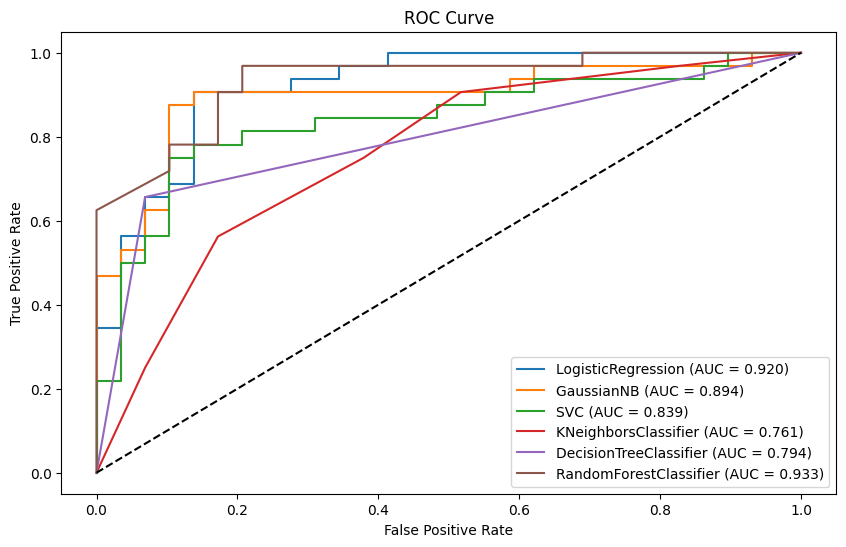

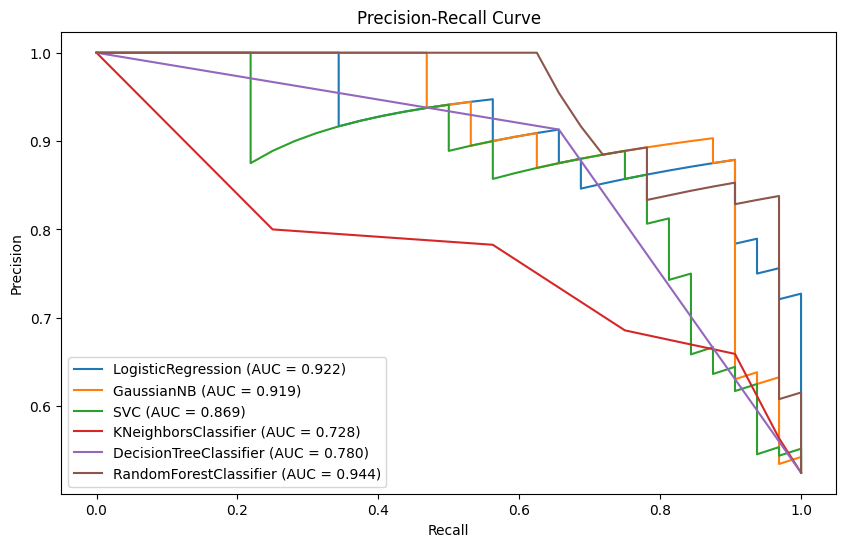


 Feature Importance and Coefficient Score

LogisticRegression Coefficient Score:
{'age': 0.01, 'sex': -1.209, 'cp': 0.77, 'trestbps': -0.011, 'chol': -0.002, 'fbs': -0.002, 'restecg': 0.542, 'thalach': 0.028, 'exang': -0.833, 'oldpeak': -0.67, 'slope': 0.623, 'ca': -0.745, 'thal': -1.017}


GaussianNB does not provide feature importance or coefficient scores.


SVC does not provide feature importance or coefficient scores.


DecisionTreeClassifier Feature Importance:
{'age': 0.108, 'sex': 0.035, 'cp': 0.225, 'trestbps': 0.064, 'chol': 0.109, 'fbs': 0.017, 'restecg': 0.016, 'thalach': 0.034, 'exang': 0.075, 'oldpeak': 0.113, 'slope': 0.047, 'ca': 0.118, 'thal': 0.038}


RandomForestClassifier Feature Importance:
{'age': 0.085, 'sex': 0.031, 'cp': 0.11, 'trestbps': 0.078, 'chol': 0.078, 'fbs': 0.009, 'restecg': 0.019, 'thalach': 0.11, 'exang': 0.082, 'oldpeak': 0.121, 'slope': 0.046, 'ca': 0.14, 'thal': 0.092}




In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
from sklearn.inspection import permutation_importance
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Load the dataset 
dataset = pd.read_csv("heart.csv")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop("target", axis=1), dataset["target"], test_size=0.2, random_state=42)

# Classification algorithms
models = [
    LogisticRegression(),
    GaussianNB(),
    SVC(probability=True),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

# Lists to store results
classifier_algorithms = []
roc_auc_scores = []
prc_auc_scores = []

#  Area under ROC and PRC for all classification algorithms
print("\n Area under ROC and PRC for all classification algorithms\n")
for model in models:
    model_name = model.__class__.__name__
    classifier_algorithms.append(model_name)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict probabilities for ROC and PRC
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC and PRC scores
    roc_auc = roc_auc_score(y_test, y_prob)
    prc_auc = average_precision_score(y_test, y_prob)
    
    roc_auc_scores.append(roc_auc)
    prc_auc_scores.append(prc_auc)
    
    print(f"{model_name} - ROC AUC: {roc_auc:.3f}, PRC AUC: {prc_auc:.3f}")

# Fig. 6: ROC Curve
plt.figure(figsize=(10, 6))
for model, roc_auc in zip(classifier_algorithms, roc_auc_scores):
    fpr, tpr, _ = roc_curve(y_test, models[classifier_algorithms.index(model)].predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Fig. 7: Precision-Recall Curve
plt.figure(figsize=(10, 6))
for model, prc_auc in zip(classifier_algorithms, prc_auc_scores):
    precision, recall, _ = precision_recall_curve(y_test, models[classifier_algorithms.index(model)].predict_proba(X_test)[:, 1])
    plt.plot(recall, precision, label=f'{model} (AUC = {prc_auc:.3f})')

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

#Feature Importance
print("\n Feature Importance and Coefficient Score\n")
for model in models:
    model_name = model.__class__.__name__
    
    if model_name not in ['KNeighborsClassifier', 'MLPClassifier']:
        # Some algorithms don't provide feature importance or coefficients
        try:
            # Train the model
            model.fit(X_train, y_train)
            
            if hasattr(model, 'feature_importances_'):
                # For tree-based models (Random Forest, AdaBoost, GradientBoosting)
                feature_importance = model.feature_importances_
                feature_importance_dict = dict(zip(X_train.columns, feature_importance))
                # Round the values to three decimal places
                feature_importance_dict = {k: round(v, 3) for k, v in feature_importance_dict.items()}
                
                print(f"{model_name} Feature Importance:")
                print(feature_importance_dict)
            elif hasattr(model, 'coef_'):
                # For linear models (Logistic Regression)
                coefficient_score = model.coef_[0]
                coefficient_score_dict = dict(zip(X_train.columns, coefficient_score))
                # Round the values to three decimal places
                coefficient_score_dict = {k: round(v, 3) for k, v in coefficient_score_dict.items()}
                
                print(f"{model_name} Coefficient Score:")
                print(coefficient_score_dict)
            else:
                print(f"{model_name} does not provide feature importance or coefficient scores.")
        except Exception as e:
            print(f"Error in obtaining feature importance or coefficient scores for {model_name}: {str(e)}")

        print("\n")
